# COVID19 classification using X-RAY images

### This projects helps to classify COVID19 along with other 2 diseases using lungs XRAY images. The classes are 
 1. COVID19
 2. Viral Pneumonia
 3. Normal
 4. Lung_Opacity

In [1]:
# Import `all the necessary libraries

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data_folder = "/home/dipesh/Downloads/archive/COVID-19_Radiography_Dataset"

In [3]:
for i in os.listdir(data_folder):
    print(i)

Normal.metadata.xlsx
Lung_Opacity
Lung_Opacity.metadata.xlsx
Normal
Viral Pneumonia
COVID
COVID.metadata.xlsx
Viral Pneumonia.metadata.xlsx
README.md.txt


### Analyse the data on excel files

The parent folder consists of excel files for each labels which have information regarding the labels and patients

In [4]:
covid_df = pd.read_excel(os.path.join(data_folder,"COVID.metadata.xlsx"))
lung_opacity_df = pd.read_excel(os.path.join(data_folder,"Lung_Opacity.metadata.xlsx"))
viral_pneumonia_df = pd.read_excel(os.path.join(data_folder,"Viral Pneumonia.metadata.xlsx"))
normal_df = pd.read_excel(os.path.join(data_folder,"Normal.metadata.xlsx"))
covid_df
lung_opacity_df
viral_pneumonia_df
normal_df

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
...,...,...,...,...
3611,COVID-3612,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
3612,COVID-3613,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
3613,COVID-3614,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...
3614,COVID-3615,PNG,256*256,https://bimcv.cipf.es/bimcv-projects/bimcv-cov...


,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,Lung_Opacity-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,Lung_Opacity-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,Lung_Opacity-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
...,...,...,...,...
6007,Lung_Opacity-6008,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
6008,Lung_Opacity-6009,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
6009,Lung_Opacity-6010,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
6010,Lung_Opacity-6011,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
2,Viral Pneumonia-3,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
3,Viral Pneumonia-4,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
4,Viral Pneumonia-5,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
...,...,...,...,...
1340,Viral Pneumonia-1341,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1341,Viral Pneumonia-1342,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1342,Viral Pneumonia-1343,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1343,Viral Pneumonia-1344,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
2,NORMAL-3,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
3,NORMAL-4,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
4,NORMAL-5,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
...,...,...,...,...
10187,NORMAL-10188,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
10188,NORMAL-10189,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
10189,NORMAL-10190,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
10190,NORMAL-10191,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


The df consists of four columns. The "FILE NAME" column consists of name of the file inside the corresponding folders, image format, image size and the image url link for reference. As we see, the dataset is imbalance as there are more normal images and few pneumonia images

In [5]:
class ProcessImage:
    """
        Consists of methods to process images and plotting
    """
    def __init__(self,image_folder_path:str,no_of_images:int):
        self.image_folder_path  = image_folder_path
        self.no_of_images = no_of_images
        
    def read_image(self) -> np.ndarray:
        images = []
        for i in os.listdir(self.image_folder_path):
            img_path = os.path.join(self.image_folder_path,i)
            img = cv2.imread(img_path)
            images.append(img)
        return images
    
    def plot_images(self):
        all_img = self.read_image()
        if len(all_img) < self.no_of_images:
            raise Exception("No of selected images should be less than total images")
        images = random.sample(self.read_image(),self.no_of_images)
        fig = plt.figure(figsize=(20,15))
        for i in range(self.no_of_images):
            fig.add_subplot(1,self.no_of_images,i+1)
            plt.title(os.path.basename(self.image_folder_path))
            plt.imshow(images[i])
        plt.show(block=True)

In [8]:
covid_folder = os.path.join(data_folder,"COVID")
pneumonia_folder = os.path.join(data_folder,"Viral Pneumonia")
lung_opacity_folder = os.path.join(data_folder,"Lung_Opacity")
normal_folder = os.path.join(data_folder,"Normal")

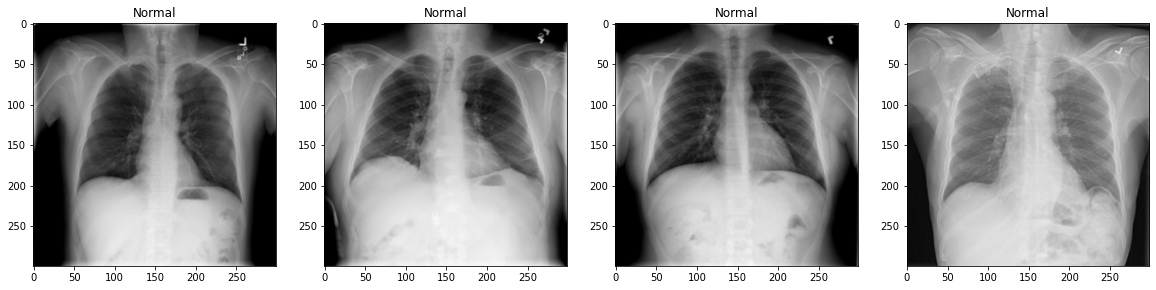

In [9]:
imgs = ProcessImage(normal_folder,4)
imgs.plot_images()

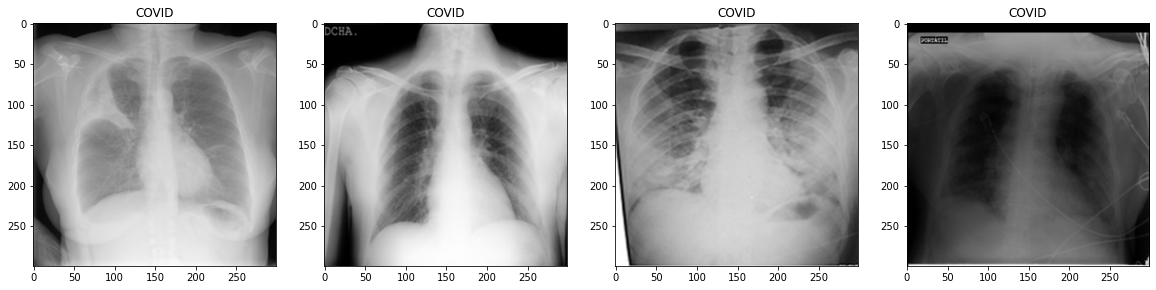

In [10]:
imgs = ProcessImage(covid_folder,4)
imgs.plot_images()

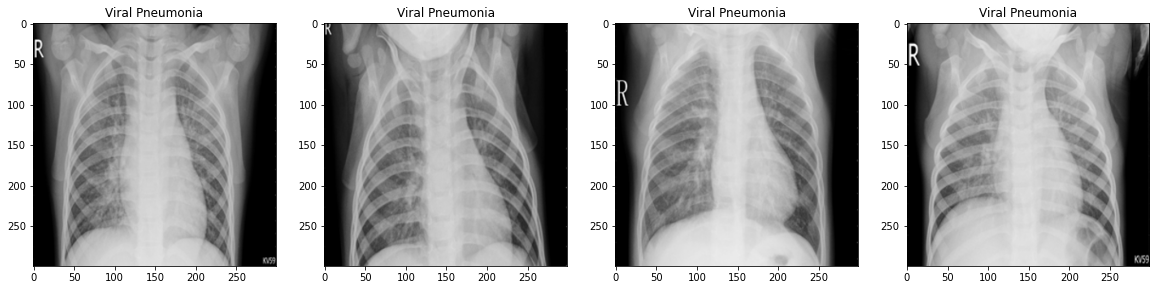

In [11]:
imgs = ProcessImage(pneumonia_folder,4)
imgs.plot_images()

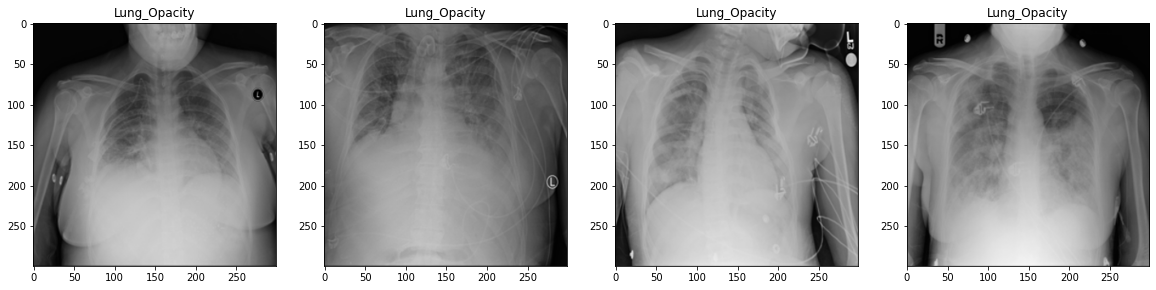

In [12]:
imgs = ProcessImage(lung_opacity_folder,4)
imgs.plot_images()